
#Image Enhancement - Image Histogram

In [31]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

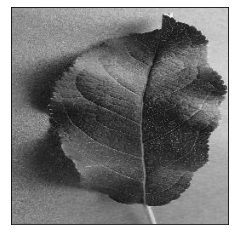

In [17]:
img = cv2.imread('/content/0c83f4eb-4949-47c8-bf63-312d16e64913___RS_HL 7619.JPG', 0)
plt.imshow(img, cmap='gray'), plt.grid(False)
plt.xticks([]), plt.yticks([])

# Histogram of an image

Text(0, 0.5, 'Frequency')

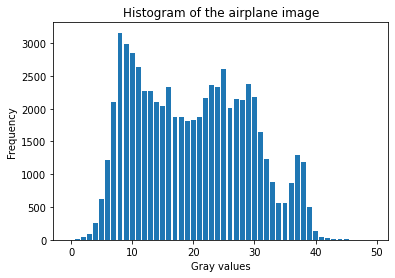

In [18]:
hist = cv2.calcHist([img],[0],None,[50],[0,256])
plt.bar(range(50), hist.ravel())
plt.title('Histogram of the airplane image')
plt.xlabel('Gray values')
plt.ylabel('Frequency')

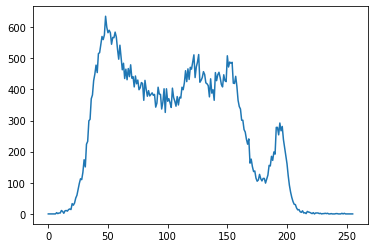

In [19]:
hist,bins = np.histogram(img.ravel(),256,[0,256])  #Alternate method
plt.plot(hist)

In [20]:
high = cv2.imread('/content/0c83f4eb-4949-47c8-bf63-312d16e64913___RS_HL 7619.JPG')
low = cv2.imread('/content/0ce497e6-8184-4ef6-9a9f-c46b66c898c3___RS_HL 6036.JPG')

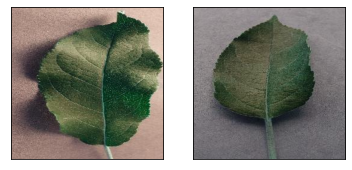

In [21]:
plt.subplot(121), plt.imshow(high)
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(low)
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.show()

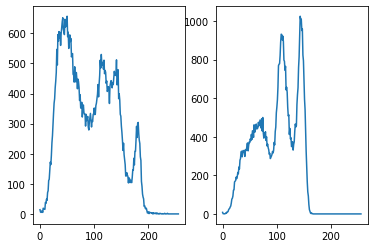

In [22]:
hist_high = cv2.calcHist([high],[2],None,[256],[0,256])
hist_low = cv2.calcHist([low],[2],None,[256],[0,256])
plt.subplot(121)
plt.plot(hist_high)
plt.subplot(122)
plt.plot(hist_low)
plt.show()

#Cumulative histogram of an image

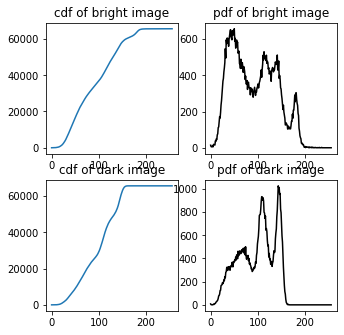

In [23]:
cdf_low = hist_low.cumsum()
cdf_high = hist_high.cumsum()
plt.subplot(221), plt.plot(cdf_high), plt. title('cdf of bright image')
plt.subplot(222), plt.plot(hist_high, 'k'), plt. title('pdf of bright image')
plt.subplot(223), plt.plot(cdf_low), plt. title('cdf of dark image')
plt.subplot(224), plt.plot(hist_low, 'k'), plt. title('pdf of dark image')
plt.subplots_adjust(bottom=2, right=0.8, top=3)
plt.show()

#Histogram Manipulation

In [24]:
low_gray = cv2.cvtColor(low, cv2.COLOR_BGR2GRAY)
high_gray = cv2.cvtColor(high, cv2.COLOR_BGR2GRAY)

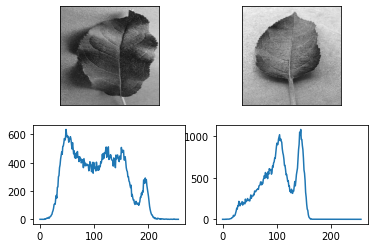

In [25]:
plt.subplot(221), plt.imshow(high_gray, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.plot(cv2.calcHist([high_gray],[0],None,[256],[0,256]))

plt.subplot(222), plt.imshow(low_gray, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.plot(cv2.calcHist([low_gray],[0],None,[256],[0,256]))
plt.show()

Brightness

In [26]:
def manip_image(image, alpha, beta): 
  new_image = np.zeros(image.shape, image.dtype) 
  for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        new_image[y,x] = np.clip(alpha*image[y,x] + beta, 0, 255) 
  return new_image

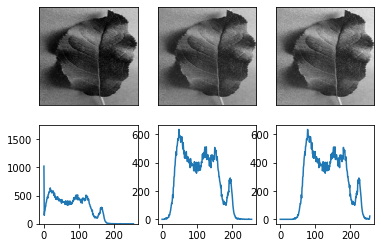

In [27]:
bright = manip_image(img, 1, 30)
dark = manip_image(img, 1, -30)
plt.figure()
plt.subplot(231), plt.imshow(dark, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.subplot(232), plt.imshow(img, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.subplot(233),plt.imshow(bright, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.subplot(234)
plt.plot(cv2.calcHist([dark],[0],None,[256],[0,256])), plt.ylim((0, 1750))
plt.subplot(235)
plt.plot(cv2.calcHist([img],[0],None,[256],[0,256]))
plt.subplot(236)
plt.plot(cv2.calcHist([bright],[0],None,[256],[0,256]))

Contrast

(0.0, 1750.0)

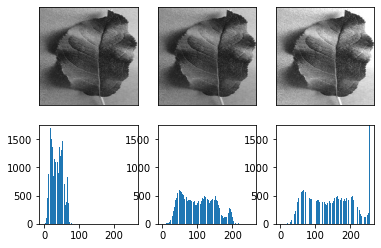

In [28]:
increase_contrast = manip_image(img, 1.35, 0)
decrease_contrast = manip_image(img, 0.35, 0)
plt.figure()
plt.subplot(231), plt.imshow(decrease_contrast, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.subplot(232), plt.imshow(img, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.subplot(233),plt.imshow(increase_contrast, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.subplot(234)
plt.bar(range(256), 
        cv2.calcHist([decrease_contrast],[0],None,[256],[0,256]).ravel())
plt.ylim((0, 1750))
plt.subplot(235)
plt.bar(range(256),
        cv2.calcHist([img],[0],None,[256],[0,256]).ravel())
plt.ylim((0, 1750))
plt.subplot(236)
plt.bar(range(256),
        cv2.calcHist([increase_contrast],[0],None,[256],[0,256]).ravel())
plt.ylim((0, 1750))

#Histogram Equalization

<BarContainer object of 256 artists>

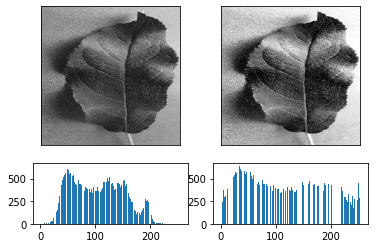

In [29]:
img_eq = cv2.equalizeHist(img)
grid = plt.GridSpec(3, 4, wspace=0.4, hspace=0.3)
plt.subplot(grid[:2, :2])
plt.imshow(img, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.subplot(grid[:2, 2:])
plt.imshow(img_eq, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.subplot(grid[2, :2])
plt.bar(range(256),
        cv2.calcHist([img],[0],None,[256],[0,256]).ravel())
plt.subplot(grid[2, 2:])
plt.bar(range(256),
        cv2.calcHist([img_eq],[0],None,[256],[0,256]).ravel())

#CLAHE- Contrast Limited Adaptive Histogram Equalization

<BarContainer object of 256 artists>

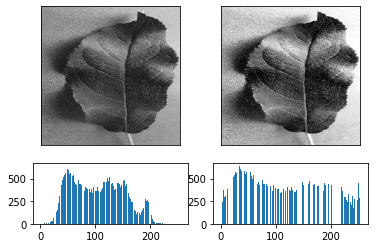

In [30]:
img_eq = cv2.equalizeHist(img)
grid = plt.GridSpec(3, 4, wspace=0.4, hspace=0.3)
plt.subplot(grid[:2, :2])
plt.imshow(img, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.subplot(grid[:2, 2:])
plt.imshow(img_eq, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.subplot(grid[2, :2])
plt.bar(range(256),
        cv2.calcHist([img],[0],None,[256],[0,256]).ravel())
plt.subplot(grid[2, 2:])
plt.bar(range(256),
        cv2.calcHist([img_eq],[0],None,[256],[0,256]).ravel())